# Color Images as Arrays

When we were learning about matrices, we saw that black-and-white images can be represented using matrices. We also *mentioned* that color images could be represented with three-dimensional arrays, but that we weren't going to get into that until we had talked about arrays with more than two dimensions. 

Well, now that we have introduced ND-Arrays, the time has come to talk about how color images can be represented in numpy!

## Primary Colors

In the back of the human eye are three types of cells designed for detecting color. Simplifying slightly ([you can read more here!](https://en.wikipedia.org/wiki/Color_vision#Physiology_of_color_perception)), one of these cell types is particularly sensitive to red wavelengths of light, one is particularly sensitive to green wavelengths of light, and one is particularly sensitive to blue wavelengths of light. As light enters the eye, it stimulates these cells, and we experience color based on the relative strength of the stimulation of these different cell types.

Conveniently for computers, this means that humans can't really tell the difference between something that is shining photons of yellow light (with a wavelength of about 580nm) and something that is shining red light (with a wavelength of about 640nm) and green light (with a wavelength of about 540nm) in equal proportions. And it's for that reason that our computers can replicate millions of colors just by lighting up lots of small red, green, and blue lights to different brightnesses!

And why does that matter to us as data scientists? Because within computers, colors are generally by three numbers, corresponding to the relative contributions of red, green, and blue required to recreate the experience of a given color. Black, for example, is represented by `0, .0, 0` because it is created by not turning on the red green or blue lights in a monitor. White, by contrast, is represented by `255, 255, 255` because all three lights are turned on to their maximum intensity, which is represented by the number 255. A color like purple can be represented by `(154, 0, 255)`—a mix of a little bit of red, no green, and a lot of blue.

**Aside**: the values 0 to 255 are 256 values, which is $2^8$—the number of unique values that can be represented by 8 bits in a computer. Thus, we all this "8 bit color." This is because in memory, everything is represented in binary, so the number 0 in 8-bit binary is 00000000, the number 1 is 00000001, the number two is 00000010, all the way up to the number 255 which is 11111111.

When you think of an image, think of a 3-dimensional array: its width (in pixels), its height (in pixels), and the three values (RGB) that tell us the color each of those pixels.

## A Real Image

Enough theory, let's take a look at a real image! In particular, let's take a look at the color version of the photo of jellyfish that we worked with the in grayscale:

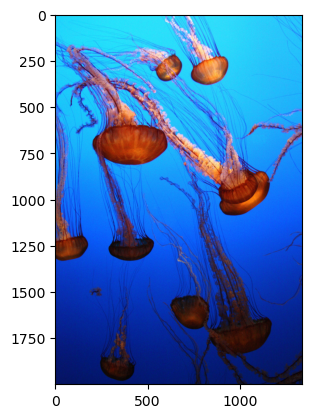

In [21]:
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

# load image as pixel array
jellyfish = image.imread("img/jellyfish_color.jpg")
plt.imshow(jellyfish)

And if we again look to see what it's made up of, we can see it has the same size in the first two dimensions as our black and white image (2000 x 1334), but unlike our black and white image, it also has a third dimension of size 3, corresponding to the intensities of Red, Green, and Blue (RGB):

In [22]:
jellyfish.shape

(2000, 1334, 3)

Also, because our color image was saved as a color jpg file, values are coded from 0 to 255 (instead of the 0 to 1 in our grayscale png file):

In [23]:
np.min(jellyfish), np.max(jellyfish)

(0, 255)

## Breaking Down Our Image

To see how we can decompose our image, let's take a look at a few of our slices. First, since the background of our picture is almost all blue, we can expect that if we look at the third layer of the array, the values will be very high (and thus close to white when plotted in grayscale). The jellyfish themselves, by contrast, are a reddish-orange with almost no blue component, and so the values of those pixels will be very low in this layer (and thus close to black when plotted in grayscale).

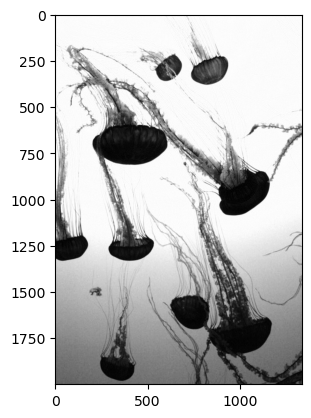

In [24]:
plt.imshow(jellyfish[:, :, 2], cmap="gray")

By contrast, if we were to look at the Red layer, we'll see almost no intensity in the background (it will appear black), but lots of intensity in the jellyfish themselves:

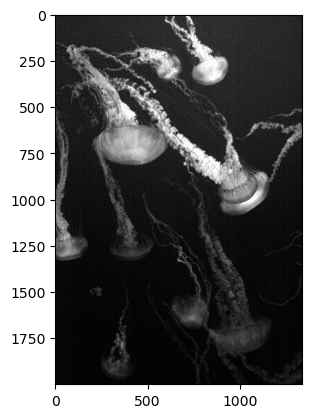

In [25]:
plt.imshow(jellyfish[:, :, 0], cmap="gray")

## A true grayscale image
While we've been visualizing the individual channels (red, green, and blue) of the image, we can easily calculate a true grayscale image using the summarization tools we've explored. The grayscale image is the mean of the intensity values of the reg, green, and blue channels. We can use our summarization tools to calculate this and display the grayscale version of this image using the tools from the last few lessons.

To do this, we need to take the mean across the third axis (indexed by "2" since we start counting at 0).

In [26]:
gray_jellyfish = np.mean(jellyfish, axis=2)
gray_jellyfish.shape

(2000, 1334)

Note that while the original size of the image was (2000, 1334, 3), after taking the mean there the array is now 2-dimensional. We can plot this to see the grayscale version of the image:

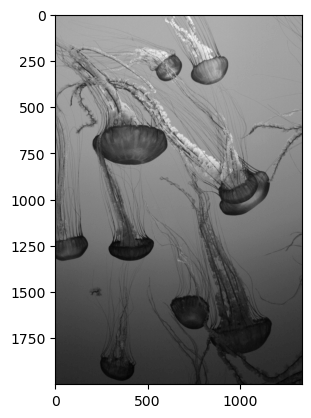

In [27]:
plt.imshow(gray_jellyfish,cmap="gray")


You'll notice this grayscale image is not the same as the blue and red layers plotted above&mdash;it's an average of all three colors.

## Subsetting image matrices

Since these are arrays, we can also subset them. Let's say we wanted to zoom in on the jellyfish to the right near the center of the image. We can use the pixel coordinates to select that. It looks like along the first dimension (axis 0, or the rows in this case) the jellyfish goes from about row 500 to about 1200. Along the second dimension (axis 1, or the columns), it extends from about column 600 to column 1300. Let's grab that subset and plot it.

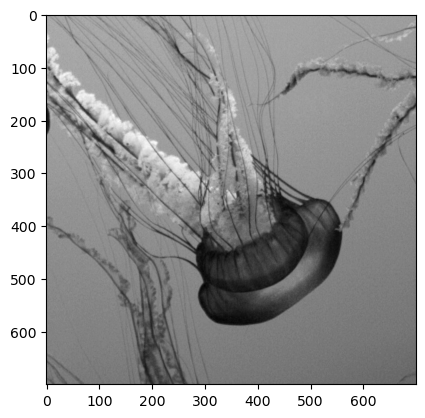

In [28]:
small_jellyfish_gray = gray_jellyfish[500:1200,600:1300]
plt.imshow(small_jellyfish_gray,cmap="gray")

Very nice! Now, let's repeat this for the color image - we just need to add on the color axis and make sure all three channels (red, green, and blue) are included:

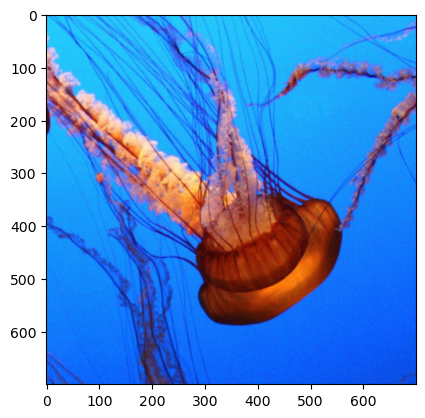

In [29]:
small_jellyfish = jellyfish[500:1200,600:1300,:]
plt.imshow(small_jellyfish)

Beautiful! While you may not want to go swimming with this little creature, it certainly is impressive.

## Other applications

Images are one type of data you may be interested in working on as a data scientist. Being able to load and manipulate these three-dimensional arrays is a valuable skill in your programming toolkit. Imagery comes in many forms and natural imagery (with the familiar red, green, and blue color channels) is only one example. There are many types of medical sensors that produce images such as x-rays and CT scans. There are infrared sensors that can produce images of heat and allow for night vision. All of the images from these sensors will produce similar types of arrays of data, and the tools that you've explored here are starting points for working with such data.